### Focusing on spectra within/out filaments
#### - what are typical slopes
#### - how do they differ with surrounding
#### - use wavelets to compare differences in/outside, fronts/middle, etc

In [1]:
#from mpl_toolkits.basemap import Basemap
import numpy as np
import scipy as sp
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import urllib.request
import xarray as xr
import pandas as pd
import glob
import os
#from datetime import datetime
import datetime as dt
from collections import OrderedDict
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from oceans.datasets import etopo_subset
from oceans.sw_extras import gamma_GP_from_SP_pt
from matplotlib.patches import Polygon
import gsw
from matplotlib import animation, rc
from IPython.display import HTML
import scipy.io
#import pixiedust # for pixie_debugger
import pycwt as wavelet
from pyspec import helmholtz as helm
from pyspec import spectrum as spec    
from itertools import islice # for slice OrderedDict

os.chdir("/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files") # need to set working directory to get the next step to work
from Benguela.src.met132_ctd_ladcp_functions import load_combine_ladcp_ctd_data #import load_ctd_data
from Benguela.src.met132_scanfish_sadcp_functions import load_combine_sadcp_scanfish_data #import load_ctd_data
import Benguela.src.met132_calc_functions as cf
import Benguela.src.met132_plotting_functions as fg
import Benguela.src.met132_sea_level_functions as sl
import Denmark_Strait.src.spectra_and_wavelet_functions as sw
import Denmark_Strait.src.ssa_core as ssa

# some colors (prettier than default boring colors)
color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'

============================================================================================================================

#### Load the data

In [2]:
# ====== load SADCP and Scanfish data
# from netcdf
#sadcp_filenames = '/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files/Benguela/netcdf_files/sadcp_transects_500m.nc'
#sadcp_transects_500m = xr.open_dataset(sadcp_filenames) 
sadcp_nc_dir = '/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files/Benguela/netcdf_files/'
#sadcp_transects_1km = xr.open_dataset(sadcp_filenames) 

scan_sadcp_transects_1km = OrderedDict() # Preallocate output dictionary
scan_sadcp_transects_1km['ScanTransect1'] = xr.open_dataset((sadcp_nc_dir+'scan_sadcp_transects_1km_ScanTransect1.nc')) 
scan_sadcp_transects_1km['ScanTransect1'] = scan_sadcp_transects_1km['ScanTransect1'].set_index(xy=['x_m','x_km','lat','lon','time','time_secs'])
scan_sadcp_transects_1km['ScanTransect2'] = xr.open_dataset((sadcp_nc_dir+'scan_sadcp_transects_1km_ScanTransect2.nc')) 
scan_sadcp_transects_1km['ScanTransect2'] = scan_sadcp_transects_1km['ScanTransect2'].set_index(xy=['x_m','x_km','lat','lon','time','time_secs'])

# actually just sadcp data, but putting them in same Dict
scan_sadcp_transects_1km['LADCP_CTD_Transect1'] = xr.open_dataset((sadcp_nc_dir+'sadcp_transects_1km_LADCP_CTD_Transect1.nc')) 
scan_sadcp_transects_1km['LADCP_CTD_Transect1'] = scan_sadcp_transects_1km['LADCP_CTD_Transect1'].set_index(xy=['x_m','x_km','lat','lon','time','time_secs'])
scan_sadcp_transects_1km['LADCP_CTD_Transect6'] = xr.open_dataset((sadcp_nc_dir+'sadcp_transects_1km_LADCP_CTD_Transect6.nc')) 
scan_sadcp_transects_1km['LADCP_CTD_Transect6'] = scan_sadcp_transects_1km['LADCP_CTD_Transect6'].set_index(xy=['x_m','x_km','lat','lon','time','time_secs'])
scan_sadcp_transects_1km['FullScanTransect1'] = xr.open_dataset((sadcp_nc_dir+'sadcp_transects_1km_FullScanTransect1.nc')) 
scan_sadcp_transects_1km['FullScanTransect1'] = scan_sadcp_transects_1km['FullScanTransect1'].set_index(xy=['x_m','x_km','lat','lon','time','time_secs'])

ctd_ladcp_transects_1km = OrderedDict() # Preallocate output dictionary
ctd_ladcp_transects_1km['LADCP_CTD_Transect1'] = xr.open_dataset((sadcp_nc_dir+'ctd_ladcp_transects_LADCP_CTD_Transect1.nc')) 
ctd_ladcp_transects_1km['LADCP_CTD_Transect1'] = ctd_ladcp_transects_1km['LADCP_CTD_Transect1'].set_index(xy=['x_m','x_km','lat','lon','time','station'])
ctd_ladcp_transects_1km['LADCP_CTD_Transect5'] = xr.open_dataset((sadcp_nc_dir+'ctd_ladcp_transects_LADCP_CTD_Transect5.nc')) 
ctd_ladcp_transects_1km['LADCP_CTD_Transect5'] = ctd_ladcp_transects_1km['LADCP_CTD_Transect5'].set_index(xy=['x_m','x_km','lat','lon','time','station'])


============================================================================================================================

#### Horizontal kinetic energy spectra

In [3]:
for key in scan_sadcp_transects_1km:
    scan_sadcp_transects_1km[key] = cf.calc_KE(scan_sadcp_transects_1km[key])    

/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a

Kinetic Energy (U,V components) Power spectra and decomposition using Bühler et al. 2014, from Rocha et al. 

In [55]:
#K_KE, psd_KE, nspec_KE = pspecd_depth_av(sadcp_transects[0], spec_variable='ke', depth_range_in=depth_range,nbins_spec_av=10)
def plot_spec_pyspec(sadcp_transect_all,title,depth_range,nbins_spec_av,spec_variables,ax,left_flag=None,line_color_start=0,
                     var_preserve_plt=False,gws_plt=False,wave_calc=False,ssa_filter=False):
    
    sadcp_transect_in = sadcp_transect_all[title]
    
    col_ind = np.arange(line_color_start,1,1/len(spec_variables))
    
    for ii in range(len(spec_variables)):
        if len(spec_variables[ii])>0:
            #print(sadcp_transect_in.z.sel(z=depth_range).values)
            K_u, psd_u, nspec_u = sw.pspecd_depth_av(sadcp_transect_in, spec_variable=spec_variables[ii], depth_range_in=depth_range,nbins_spec_av=nbins_spec_av)
            if len(spec_variables)==2 and len(spec_variables[1])==0: 
                line_label = title
            else:
                line_label = spec_variables[ii]

            if var_preserve_plt:
                uEl,uEu = spec.spec_error(K_u*psd_u/2, sn=nspec_u, ci=0.95) 
                ax.fill_between((K_u),uEl,uEu, color=plt.cm.tab20(col_ind[ii]), alpha=0.1)
                ax.loglog((K_u),K_u*psd_u/2, alpha=0.85,color=plt.cm.tab20(col_ind[ii]),lw=2,label=line_label)#('U: along-front'))
            
            elif gws_plt:
                wave_out = sw.wavelet_depth_av(sadcp_transect_in,spec_variable=spec_variables[ii], depth_range_in=depth_range,ssa_filter=ssa_filter)
                ax.loglog(1/wave_out.scales,wave_out.glbl_power, alpha=0.85,color=plt.cm.tab20(col_ind[ii]),lw=2,label=line_label)
            elif wave_calc:
                wave_out = sw.wavelet_depth_av(sadcp_transect_in,spec_variable=spec_variables[ii], depth_range_in=depth_range,ssa_filter=ssa_filter)                
            else:
                uEl,uEu = spec.spec_error(psd_u/2, sn=nspec_u, ci=0.95) 
                ax.fill_between((K_u),uEl,uEu, color=plt.cm.tab20(col_ind[ii]), alpha=0.1)
                ax.loglog((K_u),psd_u/2, alpha=0.85,color=plt.cm.tab20(col_ind[ii]),lw=2,label=line_label)#('U: along-front'))

                if spec_variables[ii] is 'across_eddy_ke':
                    psd_across = psd_u
                if spec_variables[ii] is 'along_eddy_ke':
                    psd_along = psd_u
                    psi_rot, phi_div = helm.spec_helm_decomp(K_u,psd_across, psd_along)
                    rotEl,rotEu = spec.spec_error(psi_rot/2, sn=nspec_u, ci=0.95) 
                    divEl,divEu = spec.spec_error(phi_div/2, sn=nspec_u, ci=0.95) 
                    ax.fill_between((K_u),rotEl,rotEu, color=plt.cm.autumn(0.6), alpha=0.1)
                    ax.loglog((K_u),psi_rot/2, alpha=0.85,color=plt.cm.autumn(0.6),lw=2,label=('Psi: rotational'))
                    ax.fill_between((K_u),divEl,divEu, color=plt.cm.autumn(0.9), alpha=0.1)
                    ax.loglog((K_u),phi_div/2, alpha=0.85,color=plt.cm.autumn(0.9),lw=2,label=('Phi: divergent'))
                
    if var_preserve_plt:
        xlim, ylim = [3*10**-6,10**-3], [0, 1e-3]
    elif gws_plt:
        xlim, ylim = [3*10**-6,10**-3], [1e-6, 1e2]
    else:
        xlim, ylim = [3*10**-6,10**-3], [10**-3, 2*10**2]
    sw.plot_loglog_slope(ax,np.array((-5/3,-2,-3)),xlim,ylim)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel("Along-track wavenumber [cpm]")
    if len(spec_variables)>2 and len(spec_variables[1])>0: 
        lg = ax.legend(loc=3)
        ax.text(0.98,0.95,title,
                    transform=ax.transAxes,horizontalalignment='right', verticalalignment='top')
    if left_flag: 
        if var_preserve_plt:
            ax.set_ylabel(r"KE Variance-preserving [1/cpm]")
        elif gws_plt:
            ax.set_ylabel(r"KE GWS [..]")
        else:
            ax.set_ylabel(r"KE spectral density [m$^2$ s$^{-2}$/cpm]")
        ax.text(0.98,0.90,'Depths: %i ' %sadcp_transect_in.z.sel(z=depth_range)[0] + 'to %i m' %sadcp_transect_in.z.sel(z=depth_range)[-1],
                    transform=ax.transAxes,horizontalalignment='right', verticalalignment='top')

    # !!! Minor Ticks are still not quite right
    sw.add_second_axis(ax)
    ax.set_xlabel("Along-track wavenumber [cpm]")
    
    if gws_plt or wave_calc:
        return ax, wave_out
    else:
        return ax
    
def plot_frontLocation(data_in,var_name,ax, z_index=None, z_value=None,ctd_in=None):
    data_in = data_in.reset_index('xy').swap_dims({'xy': 'x_m'})
    if z_index: 
        ax = sw.waveplt_TimeSeries(data_in.isel(z=z_index).mean(dim='z'),var_name,ax,time_name='x_m',period_name='wavelength',depth_name='z',
                                      llabel='Eddy KE',lcolor='r')
        ax.text(0.98,0.90,'Depths: %i ' %data_in.z.isel(z=z_index)[0] + 'to %i m' %data_in.z.isel(z=z_index)[-1],
                    transform=ax.transAxes,horizontalalignment='right', verticalalignment='top')
    elif z_value:
        ax = sw.waveplt_TimeSeries(data_in.sel(z=z_value).mean(dim='z'),var_name,ax,time_name='x_m',period_name='wavelength',depth_name='z',
                                      llabel='Eddy KE',lcolor='r')
        ax.text(0.98,0.90,'Depths: %i ' %data_in.z.sel(z=z_value)[0] + 'to %i m' %data_in.z.sel(z=z_value)[-1],
                    transform=ax.transAxes,horizontalalignment='right', verticalalignment='top')
    
    ax.axhline(y=0,color='k',linestyle=':')

    # use gradients, tell you where fronts are better than velocities alone
    # filter velocities first, to get clearer picture of gradient peaks
    y = 10*np.diff(ssa.ssafilter(data_in.along_prime.isel(z=2),np.int(data_in.along_prime.isel(z=2).size/3),[0,1]))
    ax.plot(data_in.x_m[0:-1]+data_in.x_m.diff(dim='x_m').mean(dim='x_m').values,y,label="dAlong' x10",color='green',linestyle='-')
    y = 10*np.diff(ssa.ssafilter(data_in.across_prime.isel(z=2),np.int(data_in.across_prime.isel(z=2).size/3),[0,1]))
    ax.plot(data_in.x_m[0:-1]+data_in.x_m.diff(dim='x_m').mean(dim='x_m').values,y,label="dAcross' x10",color='orange',linestyle='-')
    
    if 'sigma_0' in data_in:
        y = 10*np.diff(ssa.ssafilter(data_in.sigma_0.isel(z=2),np.int(data_in.across_prime.isel(z=2).size/3),[0,1]))
        ax.plot(data_in.x_m[0:-1]+data_in.x_m.diff(dim='x_m').mean(dim='x_m').values,y,label="dRho_0 x10",color='y',linestyle='-')
        #(10*data_in.sigma_0.isel(z=2).diff(dim='x_m')).rolling(x_m=10,center=True).mean().plot(x='x_m',ax=ax,label="dRho_0 x10",color='y')
    elif ctd_in:
        # too little data for diff()
        y = (ssa.ssafilter(ctd_in.sigma_0.reset_index('xy').swap_dims({'xy': 'x_m'}).sel(z=data_in.z.isel(z=2),method='nearest'),
                                     np.int(ctd_in.sigma_0.reset_index('xy').swap_dims({'xy': 'x_m'}).sel(z=data_in.z.isel(z=2),method='nearest').size/3),[0,1]))
        ax.plot(ctd_in.x_m,10*(y/np.mean(y)-1),label="Rho_0 norm",color='y',linestyle='-')
        #(1*ctd_in.sigma_0.reset_index('xy').swap_dims({'xy': 'x_m'}).sel(z=data_in.z.isel(z=2),method='nearest').diff(dim='x_m')).plot(x='x_m',ax=ax,label="dRho_0",color='y')
    ax.text(0.98,0.95,data_in.TransectName,
                transform=ax.transAxes,horizontalalignment='right', verticalalignment='top')
    if data_in.TransectDirection in ['N-S','W-E']: 
        # then flip it so it is always S-N or E-W
        x_lim2 = ax.get_xlim()
        ax.set_xlim(np.max(x_lim2),np.min(x_lim2))
        
    if data_in.TransectDirection in ['N-S', 'S-N']: 
        ax.text(5/80,-0.12,'South',transform=ax.transAxes,horizontalalignment='right',verticalalignment='bottom')
        ax.text(7.75/8,-0.12,'North',transform=ax.transAxes,horizontalalignment='right',verticalalignment='bottom')
    else:
        ax.text(5/80,-0.12,'East',transform=ax.transAxes,horizontalalignment='right',verticalalignment='bottom')
        ax.text(7.75/8,-0.12,'West',transform=ax.transAxes,horizontalalignment='right',verticalalignment='bottom')

    return ax

def plot_multi_scaleAverage(data_in,scale_range,ax, z_index=None, z_value=None):
    if isinstance(z_index,slice): 
        data_in = data_in.reset_index('xy').swap_dims({'xy': 'x_m'}).isel(z=z_index).mean(dim='z')
    elif z_index:
        data_in = data_in.reset_index('xy').swap_dims({'xy': 'x_m'}).isel(z=z_index)
    
    if isinstance(z_value,slice): 
        data_in = data_in.reset_index('xy').swap_dims({'xy': 'x_m'}).sel(z=z_value).mean(dim='z')
    elif z_value:
        data_in = data_in.reset_index('xy').swap_dims({'xy': 'x_m'}).sel(z=z_index)
    # try removing the trend
    data_in.values = ssa.ssafilter(data_in.values,np.int(data_in.size/3),np.arange(2,np.int(data_in.size/3),1))
    
    wave_out = sw.run_wavelet(data_in, avg1=scale_range, gws_range=None, time_name = 'x_m', period_name = 'wavelength')
    sw.waveplt_ScaleAverage(wave_out,scale_range,ax,time_name='x_m')
    
    return ax


#### KE for different depth ranges using across/along track velocities
#####  Example of PSD and variance-preserving spectra, compared with Global Wavelet Spectra

/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.wa

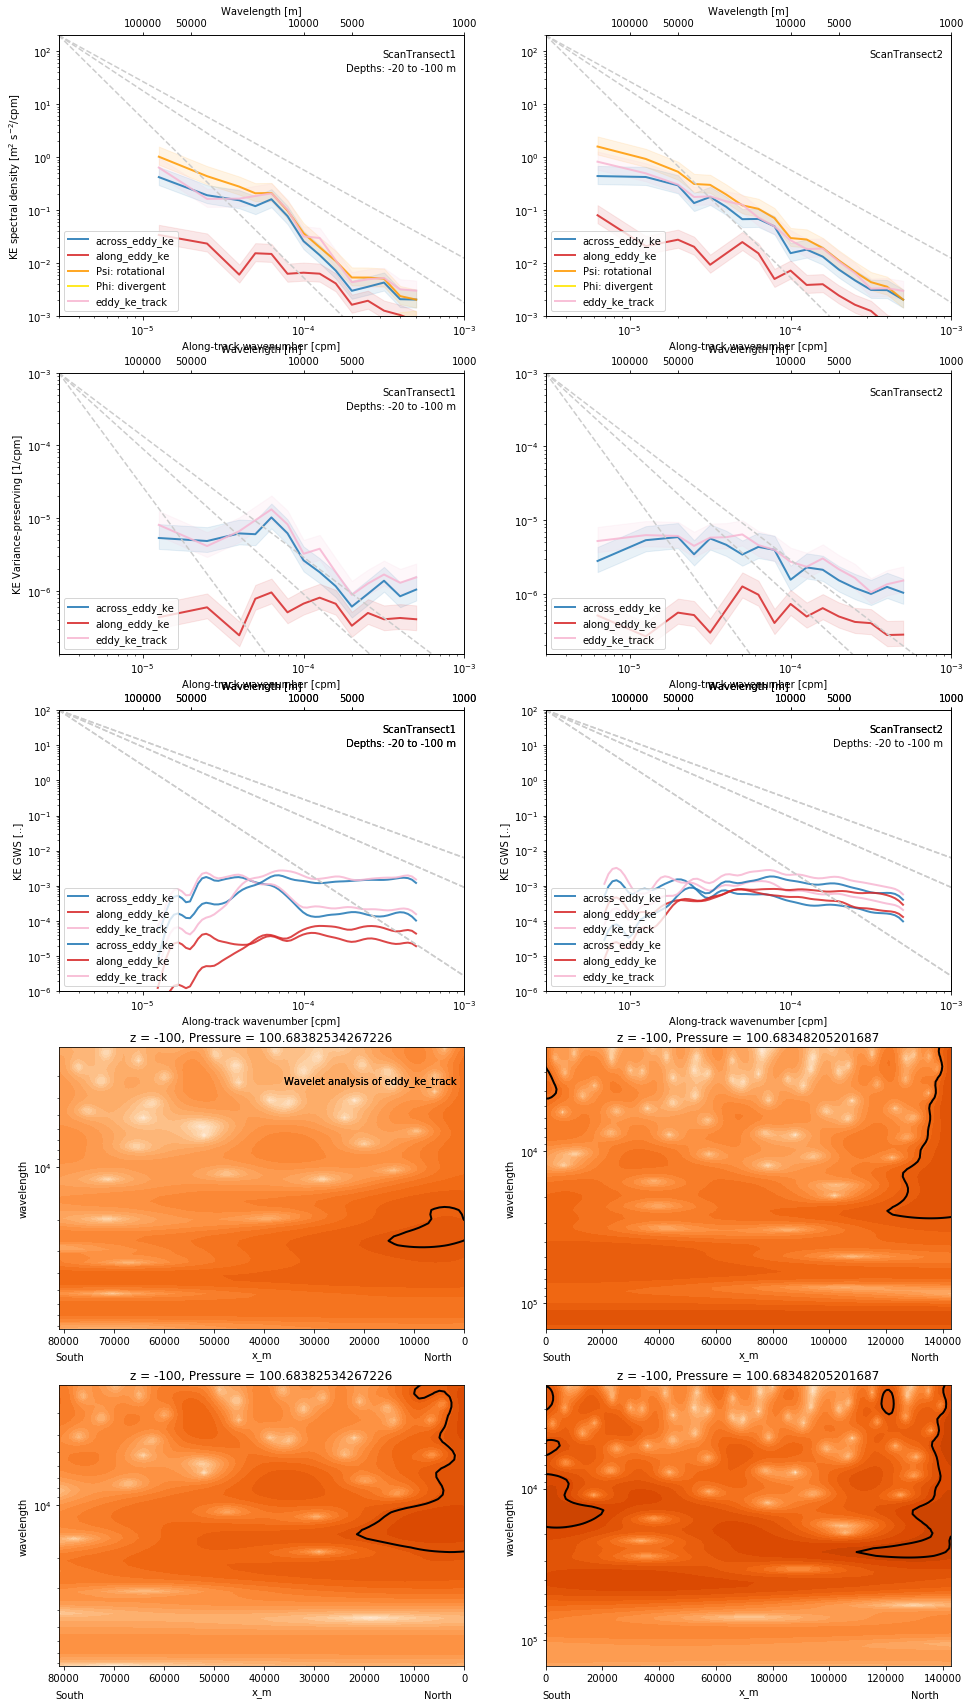

In [6]:
nbins_spec_av=10 # i.e. binned such that nbins_spec_av points are plotted for each order of magnitude (decade)

# across/along track, or U,V
spec_variables = list(('across_eddy_ke','along_eddy_ke','eddy_ke_track'))#,'ke_b'))

#fig = plt.figure(facecolor='w', figsize=(16.,6.))
nrows, ncols =  7,2
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize = (ncols*8.,nrows*6))
axs = axs.ravel()
# using different depth ranges to get average spectra
plot_spec_pyspec(scan_sadcp_transects_1km,'ScanTransect1',depth_range= slice(-19,-100),nbins_spec_av=nbins_spec_av,spec_variables=spec_variables,ax=axs[0],left_flag=True)
plot_spec_pyspec(scan_sadcp_transects_1km,'ScanTransect2',depth_range= slice(-19,-100),nbins_spec_av=nbins_spec_av,spec_variables=spec_variables,ax=axs[1])

# variance preserving plots
plot_spec_pyspec(scan_sadcp_transects_1km,'ScanTransect1',depth_range= slice(-19,-100),nbins_spec_av=nbins_spec_av,spec_variables=spec_variables,ax=axs[2],
                 left_flag=True,var_preserve_plt=True)
plot_spec_pyspec(scan_sadcp_transects_1km,'ScanTransect2',depth_range= slice(-19,-100),nbins_spec_av=nbins_spec_av,spec_variables=spec_variables,ax=axs[3],
                 left_flag=False,var_preserve_plt=True)

# Wavelet GWS
_,wave_out_T1 = plot_spec_pyspec(scan_sadcp_transects_1km,'ScanTransect1',depth_range= slice(-19,-100),nbins_spec_av=nbins_spec_av,spec_variables=spec_variables,ax=axs[4],
                 left_flag=True,gws_plt=True)
_,wave_out_T2 = plot_spec_pyspec(scan_sadcp_transects_1km,'ScanTransect2',depth_range= slice(-19,-100),nbins_spec_av=nbins_spec_av,spec_variables=spec_variables,ax=axs[5],
                 left_flag=False,gws_plt=True)
sw.waveplt_WavePower(wave_out_T1,ax=axs[6],time_name='x_m',period_name='wavelength')
if scan_sadcp_transects_1km['ScanTransect1'].TransectDirection in ['N-S','W-E']: axs[6].set_xlim(np.max(axs[6].get_xlim()),np.min(axs[6].get_xlim()))
if scan_sadcp_transects_1km['ScanTransect1'].TransectDirection in ['N-S', 'S-N']: 
    axs[6].text(5/80,-0.12,'South',transform=axs[6].transAxes,horizontalalignment='right',verticalalignment='bottom')
    axs[6].text(7.75/8,-0.12,'North',transform=axs[6].transAxes,horizontalalignment='right',verticalalignment='bottom')
axs[6].text(0.98,0.90,('Wavelet analysis of '+spec_variables[-1]),
            transform=axs[6].transAxes,horizontalalignment='right', verticalalignment='top')

sw.waveplt_WavePower(wave_out_T2,ax=axs[7],time_name='x_m',period_name='wavelength')
if scan_sadcp_transects_1km['ScanTransect2'].TransectDirection in ['N-S','W-E']: axs[7].set_xlim(np.max(axs[7].get_xlim()),np.min(axs[7].get_xlim()))
if scan_sadcp_transects_1km['ScanTransect2'].TransectDirection in ['N-S', 'S-N']: 
    axs[7].text(5/80,-0.12,'South',transform=axs[7].transAxes,horizontalalignment='right',verticalalignment='bottom')
    axs[7].text(7.75/8,-0.12,'North',transform=axs[7].transAxes,horizontalalignment='right',verticalalignment='bottom')

# repeate wavelet plot with filtered data series
_,wave_out_T1_filt = plot_spec_pyspec(scan_sadcp_transects_1km,'ScanTransect1',depth_range= slice(-19,-100),nbins_spec_av=nbins_spec_av,spec_variables=spec_variables,ax=axs[4],
                 left_flag=True,gws_plt=True,ssa_filter=True)
_,wave_out_T2_filt = plot_spec_pyspec(scan_sadcp_transects_1km,'ScanTransect2',depth_range= slice(-19,-100),nbins_spec_av=nbins_spec_av,spec_variables=spec_variables,ax=axs[5],
                 left_flag=True,gws_plt=True,ssa_filter=True)
sw.waveplt_WavePower(wave_out_T1_filt,ax=axs[8],time_name='x_m',period_name='wavelength')
if scan_sadcp_transects_1km['ScanTransect1'].TransectDirection in ['N-S','W-E']: axs[8].set_xlim(np.max(axs[6].get_xlim()),np.min(axs[8].get_xlim()))
if scan_sadcp_transects_1km['ScanTransect1'].TransectDirection in ['N-S', 'S-N']: 
    axs[8].text(5/80,-0.12,'South',transform=axs[8].transAxes,horizontalalignment='right',verticalalignment='bottom')
    axs[8].text(7.75/8,-0.12,'North',transform=axs[8].transAxes,horizontalalignment='right',verticalalignment='bottom')
axs[8].text(0.98,0.90,('Wavelet analysis of '+spec_variables[-1]),
            transform=axs[6].transAxes,horizontalalignment='right', verticalalignment='top')
sw.waveplt_WavePower(wave_out_T2_filt,ax=axs[9],time_name='x_m',period_name='wavelength')
if scan_sadcp_transects_1km['ScanTransect2'].TransectDirection in ['N-S','W-E']: axs[7].set_xlim(np.max(axs[9].get_xlim()),np.min(axs[9].get_xlim()))
if scan_sadcp_transects_1km['ScanTransect2'].TransectDirection in ['N-S', 'S-N']: 
    axs[9].text(5/80,-0.12,'South',transform=axs[9].transAxes,horizontalalignment='right',verticalalignment='bottom')
    axs[9].text(7.75/8,-0.12,'North',transform=axs[9].transAxes,horizontalalignment='right',verticalalignment='bottom')

var_names = list(('u',''))
fg.plot_profile_view(select_transects, None, var_names, x_lim=x_lim, y_lim=y_lim)
var_names = list(('v',''))
fg.plot_profile_view(select_transects, None, var_names, x_lim=x_lim, y_lim=y_lim)#, last_row_flag=1)

#!! leave this as example of decomposition, then plot transects together in another plot; from there take one example and run wavelet analysis to explain
#then combine wavelet results

#### Where is energy coming for different ranges of scales?

#### 50 - 70 km

(<matplotlib.axes._subplots.AxesSubplot at 0x12b6d7f28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12b758ac8>)

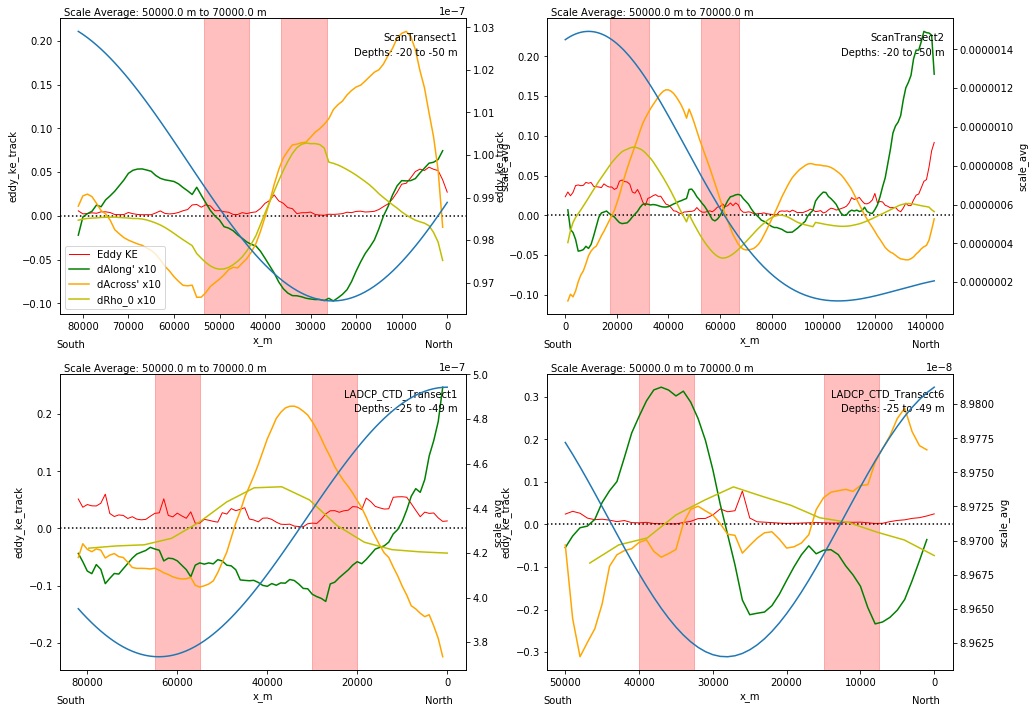

In [57]:
nrows, ncols =  2,2
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize = (ncols*8.,nrows*6))
axs = axs.ravel()

# plot T gradient=M2 at shallow depth and across-track to identify fronts
# since don't always have M2, is across-track comparable?

var_name = 'eddy_ke_track'
scale_range = [5e4,7e4]
depth_range = slice(-19,-50)

def plot_combine_front_waveScaleAv(data_in,var_name,z_val_ind,scale_range,ax,ctd_data=None,shade_x=None):
    ax = plot_frontLocation(data_in, var_name, ax,z_value=z_val_ind,ctd_in=ctd_data)
    axs0 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    asx0 = plot_multi_scaleAverage(data_in[var_name],scale_range,axs0,z_value=z_val_ind)
    if shade_x:
        ax.axvspan(shade_x[0], shade_x[1], alpha=0.25, color=shade_x[2])
        ax.axvspan(shade_x[3], shade_x[4], alpha=0.25, color=shade_x[5])
        #axs[si].text(5e-5,8,'-5/3 to -2',color='red',horizontalalignment='right',fontsize=10)
    return ax,axs0
    
si = 0
axs[si],axs0 =plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['ScanTransect1'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si],shade_x=list((4.35e4,5.35e4,'red',2.65e4,3.65e4,'red')))
fig.legend(loc=3, bbox_to_anchor=(0,0), bbox_transform=axs[si].transAxes)
plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['ScanTransect2'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si+1],shade_x=list((1.75e4,3.25e4,'red',5.25e4,6.75e4,'red')))
plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['LADCP_CTD_Transect1'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si+2],shade_x=list((5.5e4,6.5e4,'red',2e4,3e4,'red')),
                               ctd_data=ctd_ladcp_transects_1km['LADCP_CTD_Transect1'])
plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['LADCP_CTD_Transect6'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si+3],shade_x=list((3.25e4,4e4,'red',.75e4,1.5e4,'red')),
                               ctd_data=ctd_ladcp_transects_1km['LADCP_CTD_Transect5'])


## NOTES: generally, all show higher wavelet power in middle of filament, where strongest westward flow is (double check flow direction of some of these,
##  maybe better to use u,v). Therefore, probably just showing the scale of the filament ie the major change in velocity between inside and outside of the 
## filament. Look at smaller scales, where do they have peaks?!?!?!


#### 10 - 50 km

(<matplotlib.axes._subplots.AxesSubplot at 0x12beb6b00>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12bfcc9b0>)

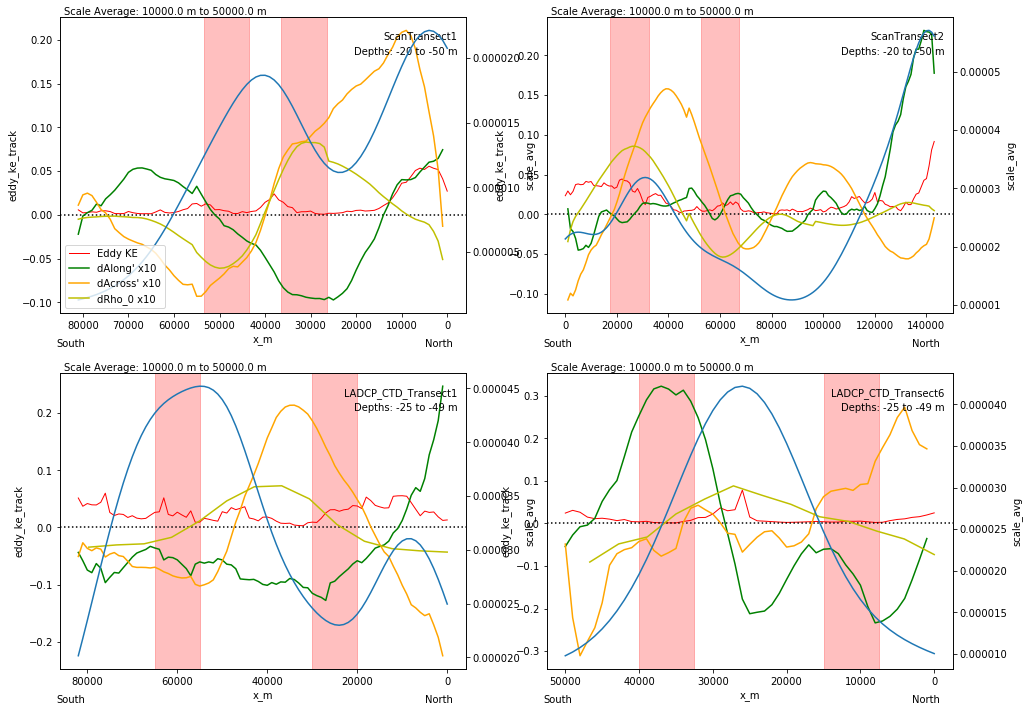

In [58]:
nrows, ncols =  2,2
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize = (ncols*8.,nrows*6))
axs = axs.ravel()

# plot T gradient=M2 at shallow depth and across-track to identify fronts
# since don't always have M2, is across-track comparable?

var_name = 'eddy_ke_track'
scale_range = [1e4,5e4]
depth_range = slice(-19,-50)

def plot_combine_front_waveScaleAv(data_in,var_name,z_val_ind,scale_range,ax,ctd_data=None,shade_x=None):
    ax = plot_frontLocation(data_in, var_name, ax,z_value=z_val_ind,ctd_in=ctd_data)
    axs0 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    asx0 = plot_multi_scaleAverage(data_in[var_name],scale_range,axs0,z_value=z_val_ind)
    if shade_x:
        ax.axvspan(shade_x[0], shade_x[1], alpha=0.25, color=shade_x[2])
        ax.axvspan(shade_x[3], shade_x[4], alpha=0.25, color=shade_x[5])
        #axs[si].text(5e-5,8,'-5/3 to -2',color='red',horizontalalignment='right',fontsize=10)
    return ax,axs0
    
si = 0
axs[si],axs0 =plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['ScanTransect1'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si],shade_x=list((4.35e4,5.35e4,'red',2.65e4,3.65e4,'red')))
fig.legend(loc=3, bbox_to_anchor=(0,0), bbox_transform=axs[si].transAxes)
plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['ScanTransect2'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si+1],shade_x=list((1.75e4,3.25e4,'red',5.25e4,6.75e4,'red')))
plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['LADCP_CTD_Transect1'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si+2],shade_x=list((5.5e4,6.5e4,'red',2e4,3e4,'red')),
                               ctd_data=ctd_ladcp_transects_1km['LADCP_CTD_Transect1'])
plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['LADCP_CTD_Transect6'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si+3],shade_x=list((3.25e4,4e4,'red',.75e4,1.5e4,'red')),
                               ctd_data=ctd_ladcp_transects_1km['LADCP_CTD_Transect5'])



#### 5 - 10 km

(<matplotlib.axes._subplots.AxesSubplot at 0x12ccb8e10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12d4032b0>)

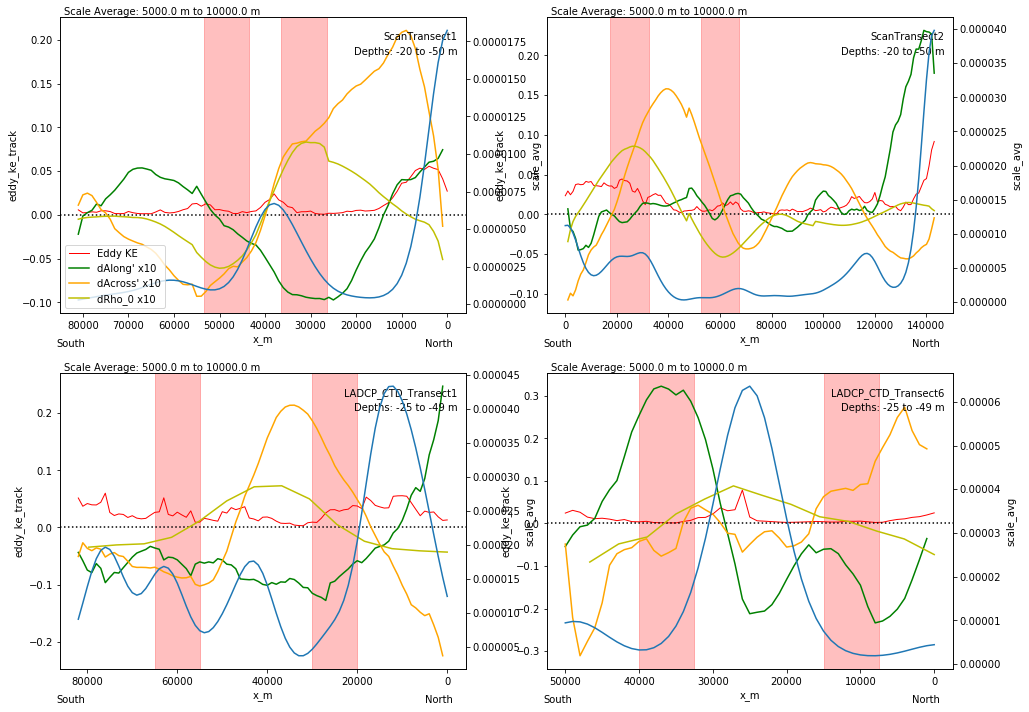

In [61]:
nrows, ncols =  2,2
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize = (ncols*8.,nrows*6))
axs = axs.ravel()

# plot T gradient=M2 at shallow depth and across-track to identify fronts
# since don't always have M2, is across-track comparable?

var_name = 'eddy_ke_track'
scale_range =[5e3,1e4]
depth_range = slice(-19,-50)

def plot_combine_front_waveScaleAv(data_in,var_name,z_val_ind,scale_range,ax,ctd_data=None,shade_x=None):
    ax = plot_frontLocation(data_in, var_name, ax,z_value=z_val_ind,ctd_in=ctd_data)
    axs0 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    asx0 = plot_multi_scaleAverage(data_in[var_name],scale_range,axs0,z_value=z_val_ind)
    if shade_x:
        ax.axvspan(shade_x[0], shade_x[1], alpha=0.25, color=shade_x[2])
        ax.axvspan(shade_x[3], shade_x[4], alpha=0.25, color=shade_x[5])
        #axs[si].text(5e-5,8,'-5/3 to -2',color='red',horizontalalignment='right',fontsize=10)
    return ax,axs0
    
si = 0
axs[si],axs0 =plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['ScanTransect1'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si],shade_x=list((4.35e4,5.35e4,'red',2.65e4,3.65e4,'red')))
fig.legend(loc=3, bbox_to_anchor=(0,0), bbox_transform=axs[si].transAxes)
plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['ScanTransect2'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si+1],shade_x=list((1.75e4,3.25e4,'red',5.25e4,6.75e4,'red')))
plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['LADCP_CTD_Transect1'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si+2],shade_x=list((5.5e4,6.5e4,'red',2e4,3e4,'red')),
                               ctd_data=ctd_ladcp_transects_1km['LADCP_CTD_Transect1'])
plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['LADCP_CTD_Transect6'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si+3],shade_x=list((3.25e4,4e4,'red',.75e4,1.5e4,'red')),
                               ctd_data=ctd_ladcp_transects_1km['LADCP_CTD_Transect5'])



#### 2 - 5 km

(<matplotlib.axes._subplots.AxesSubplot at 0x12cd28b00>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12ce341d0>)

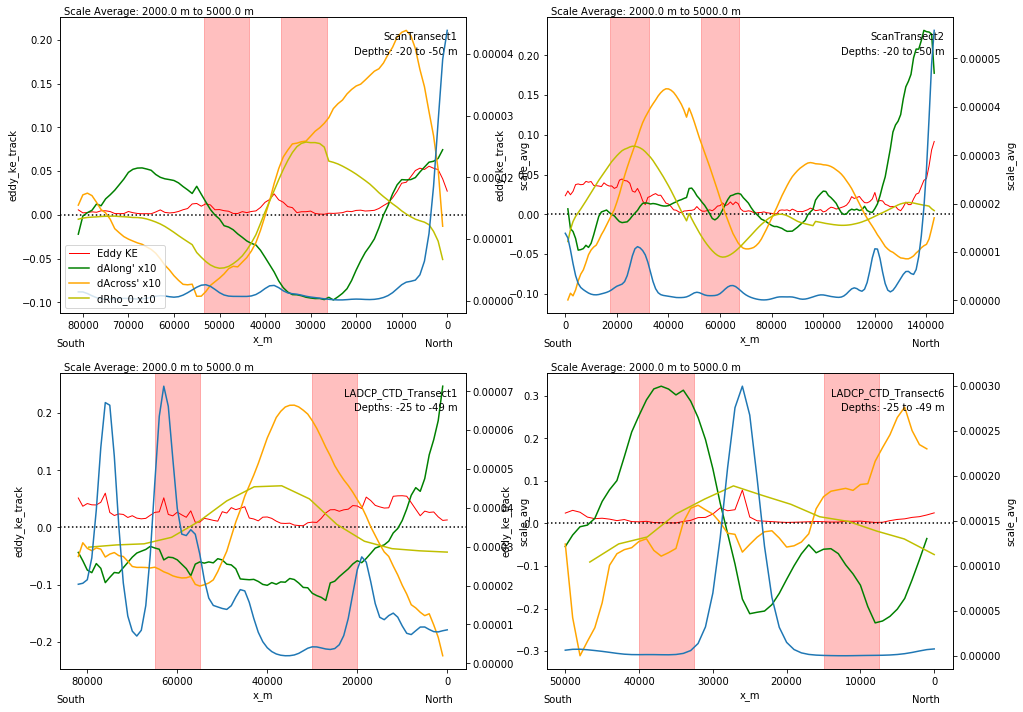

In [60]:
nrows, ncols =  2,2
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize = (ncols*8.,nrows*6))
axs = axs.ravel()

# plot T gradient=M2 at shallow depth and across-track to identify fronts
# since don't always have M2, is across-track comparable?

var_name = 'eddy_ke_track'
scale_range =[2e3,5e3]
depth_range = slice(-19,-50)

def plot_combine_front_waveScaleAv(data_in,var_name,z_val_ind,scale_range,ax,ctd_data=None,shade_x=None):
    ax = plot_frontLocation(data_in, var_name, ax,z_value=z_val_ind,ctd_in=ctd_data)
    axs0 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    asx0 = plot_multi_scaleAverage(data_in[var_name],scale_range,axs0,z_value=z_val_ind)
    if shade_x:
        ax.axvspan(shade_x[0], shade_x[1], alpha=0.25, color=shade_x[2])
        ax.axvspan(shade_x[3], shade_x[4], alpha=0.25, color=shade_x[5])
        #axs[si].text(5e-5,8,'-5/3 to -2',color='red',horizontalalignment='right',fontsize=10)
    return ax,axs0
    
si = 0
axs[si],axs0 =plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['ScanTransect1'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si],shade_x=list((4.35e4,5.35e4,'red',2.65e4,3.65e4,'red')))
fig.legend(loc=3, bbox_to_anchor=(0,0), bbox_transform=axs[si].transAxes)
plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['ScanTransect2'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si+1],shade_x=list((1.75e4,3.25e4,'red',5.25e4,6.75e4,'red')))
plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['LADCP_CTD_Transect1'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si+2],shade_x=list((5.5e4,6.5e4,'red',2e4,3e4,'red')),
                               ctd_data=ctd_ladcp_transects_1km['LADCP_CTD_Transect1'])
plot_combine_front_waveScaleAv(data_in=scan_sadcp_transects_1km['LADCP_CTD_Transect6'],var_name=var_name,
                               z_val_ind=depth_range,scale_range=scale_range,ax=axs[si+3],shade_x=list((3.25e4,4e4,'red',.75e4,1.5e4,'red')),
                               ctd_data=ctd_ladcp_transects_1km['LADCP_CTD_Transect5'])



In [40]:
288000.*30/60/60/24

100.0